In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from iterate_z import iterate


In [2]:
def iterate(c_arr, index):
    """iterate the mandelbrot map
    
    Inputs:
    c_arr------array-like, coordinates of a pt in the complex plane 
    
    index----number of iterations
    
    Returns:
    Iteration at which the point is beyond the critcal limit
    """
    
    z=0
    for i in range(index):
        z = z*z +c_arr
    return np.isnan(abs(z))==False, np.isnan(abs(z))== True #boolean numpy arrays 


#I know this is supposed to be in a separate py file but the editor I used could not find numpy

Question 1) Complex number iteration

In [3]:
x_array = np.linspace(-2, 2,1000) 
y_array = np.linspace(-2, 2,1000)

c_array = x_array[np.newaxis, :] + y_array[:, np.newaxis]*1j #creating complex plane



/var/folders/tv/8nb5qtb54l141hsylldc0nqh0000gp/T/ipykernel_46269/3108428597.py:15: RuntimeWarning: overflow encountered in multiply
  z = z*z +c_arr
/var/folders/tv/8nb5qtb54l141hsylldc0nqh0000gp/T/ipykernel_46269/3108428597.py:15: RuntimeWarning: invalid value encountered in multiply
  z = z*z +c_arr
/var/folders/tv/8nb5qtb54l141hsylldc0nqh0000gp/T/ipykernel_46269/3108428597.py:16: RuntimeWarning: overflow encountered in absolute
  return np.isnan(abs(z))==False, np.isnan(abs(z))== True #boolean numpy arrays


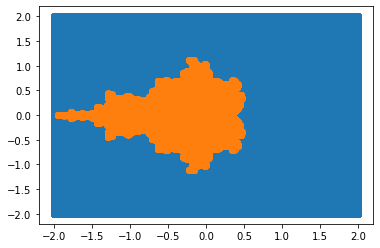

In [4]:
div_coord=iterate(c_array,20)[1]
div=c_array[div_coord]
conv_coord=iterate(c_array,20)[0]
conv=c_array[conv_coord]
plt.scatter(np.real(div), np.imag(div)) #plots the first image 
plt.scatter(np.real(conv), np.imag(conv))
plt.savefig("image1")

/Users/alyssaatkinson/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:4193: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


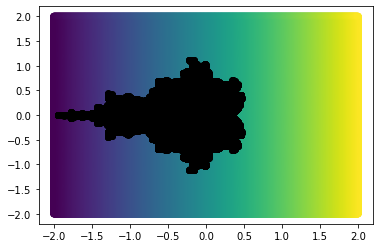

In [5]:
plt.scatter(np.real(div), np.imag(div),  c= div) #plots the second
plt.scatter(np.real(conv), np.imag(conv), c='black')
plt.savefig('image2')

Question 2) Lorenz Equations

In [6]:
from scipy.integrate import solve_ivp

Part 1) and 2) defining the system of equations and solving the system 

In [7]:
def lorenz(t,y):
# defining the Lorenz equation
    """defines the lorenz functions
    Parameters:
    t: time
    y: initial conditions
    sigma= Prantdl number
    r: Rayleigh number
    b: dimensionless length scale
    """
    
    X, Y, Z = y
    fX= -(10)*(X-Y)
    fY= 28*X - Y -(X*Z)
    fZ= -(8./3.)*Z + X*Y
    return fX,fY,fZ

#solving the system of ODEs

sol =solve_ivp ( lorenz,(0,60), (0., 1., 0.), t_eval=np.linspace(0, 30, 3000)) #for fig 1
X, Y, Z= sol.y

sol2=solve_ivp ( lorenz,(0,60), (0., 1., 0.), t_eval=np.linspace(14, 19, 1000)) #for fig 2
X2, Y2, Z2= sol2.y



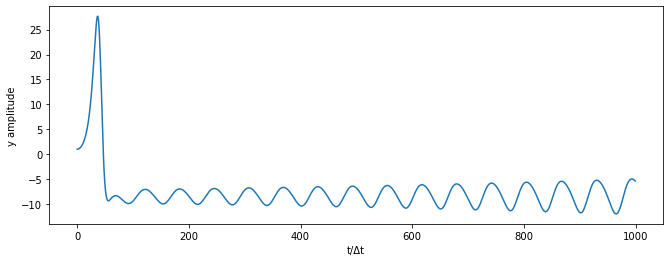

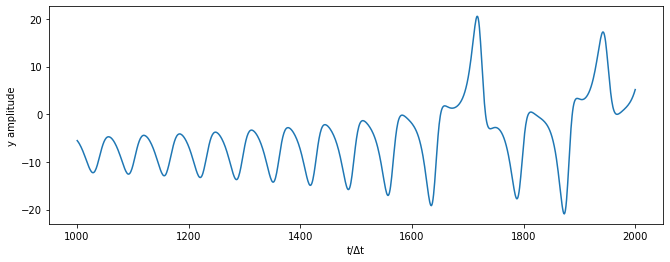

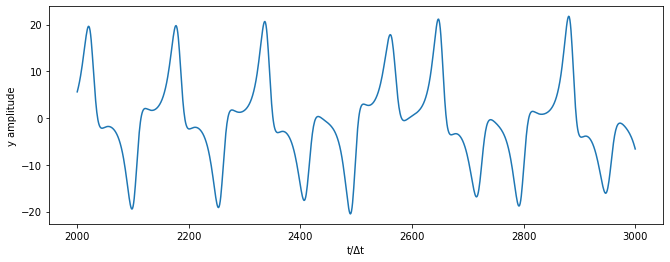

In [8]:
#plotting figure 2

tplot=sol.t/0.01

plt.figure(figsize=(11,4))
plt.plot(tplot[0:1000], Y[0:1000])
plt.ylabel('y amplitude')
plt.xlabel("t/Δt")
plt.show()

plt.figure(figsize=(11,4))
plt.plot(tplot[1000:2000], Y[1000:2000])
plt.ylabel('y amplitude')
plt.xlabel("t/Δt")
plt.show()


plt.figure(figsize=(11,4))
plt.plot(tplot[2000:3000], Y[2000:3000])
plt.ylabel('y amplitude')
plt.xlabel("t/Δt")
plt.show()



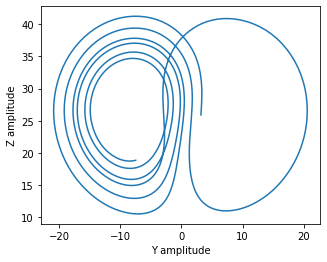

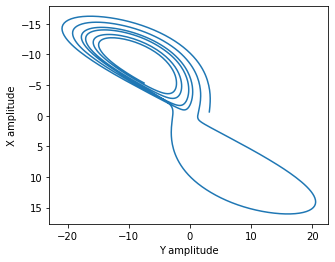

In [9]:

fig1 = plt.figure(figsize=(5,4))
plt.plot(Y2, Z2)
plt.ylabel('Z amplitude')
plt.xlabel("Y amplitude")
plt.show()

fig2 = plt.figure(figsize=(5,4))
plt.plot(Y2, X2)
plt.ylabel('X amplitude')
plt.xlabel("Y amplitude")
plt.gca().invert_yaxis()

plt.show()


Part 5) Changing initial conditions and plotting distance vs time

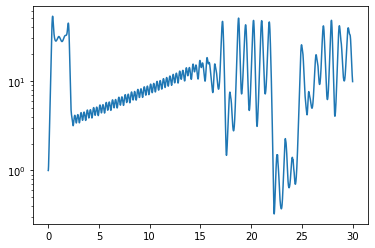

In [11]:
#calculating the new initial condition
increment=(0, 1E-8, 0)
prev_cond=(0, 1, 0)
newcondition= (increment[0]+prev_cond[0],increment[1]+prev_cond[2],increment[2]+prev_cond[2])
#solving the equations with this new conditon
sol3 =solve_ivp ( lorenz,(0,60), newcondition , t_eval=np.linspace(0, 30, 3000)) 
X3, Y3, Z3= sol3.y




diff=[]
subtracted=[]
for i in range(0,3000):
    s1=(X[i],Y[i],Z[i])
    s3=(X3[i],Y3[i],Z3[i])
    subtracted.append((X[i]-X3[i], Y[i]-Y3[i], Z[i]-Z3[i] ))

for i in range(0,3000):
    diff.append(np.linalg.norm(subtracted[i]))   


plt.plot(sol.t, diff)
plt.yscale("log")
